## Cat and Dog Classifications 
####  Name                   : Muhammad Idham Habibie 
#### Student Number : PYIM004UH004

- **Abstract** <br/>
A Dog and Cat classification is a standard classification in computer vision. This project utilizes a method called Convolutional Neural Network (CNN) as the most appropriate method to classify the images for Dog and Cat. Besides, the total number of given dataset is 2000 images, where the model should able to predict 1000 images whether it is a Dog and Cat. <br/>
Several parameters used CNN is explained  as follows : <br/>
    * Convolutional <br/>
      This model is using kernel size (3,3) for width and length respectively, with additional 32 filters and kernel size (3,3). The input shape is (64,64,3)  
    * Batch Normalization
    * Maximum Pooling
    * Dropout
    * Flatten
    * Hidden Layers additional <br/>

We have running 50 epochs with a mini-batch of 2. The training accuracy and validation accuracy are **0.9177** and **0.7129**


- **Project Objective** <br/>
This project aims to classify the Cat and Dog based on a given Dataset, with a total number of 1000 images that needs to predict whether it is a Cat or Dog. Besides, this trained dataset has 2000 images that classify the Dog and Cat categories <br/>
- **Project Background** <br />
The Dataset of this project refers to the source of Hacktiv8 in Intermediate Python class, batch 4. There are 2000 images of Dataset, which belongs to 2 classes (Dog and Cats) and also 1000 images of validation which belongs to 2 classes (Dog and Cats)

### 1. Import the Libraries

In [1]:
# Import all libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

from PIL import Image
import PIL
# Import All Images Libraries
from matplotlib import pyplot
from matplotlib.image import imread

### 2. Loading the Dataset
I put the directory to **cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats/** for the training dataset of cats. The Directory here is related to Cats. 

cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats/cat.0.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats/cat.1.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats/cat.2.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats/cat.3.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats/cat.4.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats/cat.5.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats/cat.6.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats/cat.7.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats/cat.8.jpg


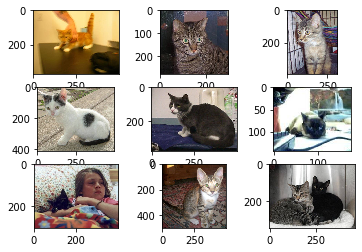

In [18]:
# Loading the Dataset
folder = "cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats/"

# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'cat.' + str(i) + '.jpg'
    print(filename)
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.0.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.1.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.2.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.3.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.4.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.5.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.6.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.7.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.8.jpg


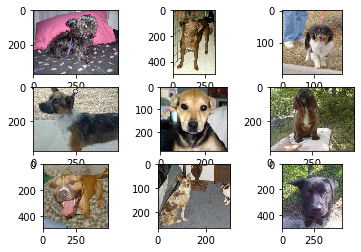

In [19]:
# Loading the Dataset
folder = "cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/"

# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'dog.' + str(i) + '.jpg'
    print(filename)
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

## 3. Image Data Generator

- Loading the Training and Test Dataset, the trainDataset and testDataset

In [4]:
#From Keras Documentation
from keras.preprocessing.image import ImageDataGenerator

trainDatagen = ImageDataGenerator(
                    rescale=1./255,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True)

testDatagen = ImageDataGenerator(rescale=1./255)

trainDataset = trainDatagen.flow_from_directory(
        'cats_and_dogs_filtered/cats_and_dogs_filtered/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

testDataset = testDatagen.flow_from_directory(
        'cats_and_dogs_filtered/cats_and_dogs_filtered/validation',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Using TensorFlow backend.


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## 4. Define the parameter for Convolutional Neural Network (CNN)
We are using the basic convolutional model 2D (CNN), which consist of : 

- Convolutional (2 times)
- BatchNormalization (2 times)
- Maximum Pooling (3 times)
- Dropout (3 times)

In [5]:
# Initializising CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size= (3,3),
                           activation="relu", padding = 'same', input_shape=(64, 64, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=32, kernel_size= (3,3), padding = 'same',activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0

## 5. Compiling the CNN to the model

In [6]:
batch_size = 2
# Compiling to the CNN
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Fitting the CNN to the images
history = model.fit_generator(
    trainDataset,
    epochs=50,
    steps_per_epoch= math.ceil(len(trainDataset))/batch_size,
    validation_data=testDataset, 
    validation_steps = math.ceil(len(testDataset))/batch_size
)

Epoch 1/50
32/31 [==============================] - 23s 720ms/step - loss: 1.4077 - accuracy: 0.5117 - val_loss: 1.3212 - val_accuracy: 0.4980
Epoch 2/50
32/31 [==============================] - 21s 661ms/step - loss: 0.6806 - accuracy: 0.5784 - val_loss: 1.8622 - val_accuracy: 0.4980
Epoch 3/50
32/31 [==============================] - 20s 612ms/step - loss: 0.6675 - accuracy: 0.6369 - val_loss: 2.2274 - val_accuracy: 0.4980
Epoch 4/50
32/31 [==============================] - 25s 773ms/step - loss: 0.6396 - accuracy: 0.6709 - val_loss: 2.2936 - val_accuracy: 0.4980
Epoch 5/50
32/31 [==============================] - 27s 837ms/step - loss: 0.6024 - accuracy: 0.6776 - val_loss: 2.2777 - val_accuracy: 0.5020
Epoch 6/50
32/31 [==============================] - 20s 637ms/step - loss: 0.6039 - accuracy: 0.6904 - val_loss: 3.6671 - val_accuracy: 0.5039
Epoch 7/50
32/31 [==============================] - 19s 582ms/step - loss: 0.5739 - accuracy: 0.6846 - val_loss: 3.9632 - val_accuracy: 0.5156

## 6. Plotting the Losses and Validation Losses

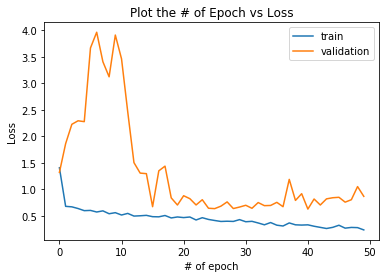

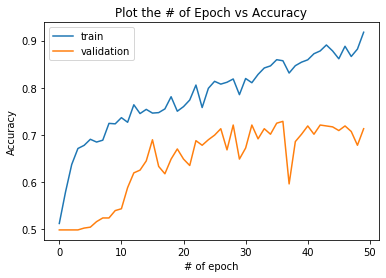

In [7]:
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="validation")
plt.xlabel("# of epoch")
plt.ylabel("Loss")
plt.title("Plot the # of Epoch vs Loss")
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label="train")
plt.plot(history.history['val_accuracy'], label="validation")
plt.xlabel("# of epoch")
plt.ylabel("Accuracy")
plt.title("Plot the # of Epoch vs Accuracy")
plt.legend()
plt.show()

In [8]:
# Predicting the Value
predictions = model.predict(testDataset)
print("preds:", np.argmax(predictions, axis=1))

preds: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0

In [9]:
# Evaluating the Model
model.evaluate(testDataset, steps = math.ceil(len(testDataset)/batch_size))

16/16 [==============================] - 3s 180ms/step - loss: 0.8702 - accuracy: 0.7129


[0.8702298030257225, 0.7128906]

In [10]:
c = []
d = []
for i in predictions:
    c.append(i) # Cat
    d.append(1-i) # Dog

In [15]:
df = pd.DataFrame(list(zip(c, d)), 
               columns =['Cat', 'Dog']) 

In [12]:
df.iloc[:,1]

0       [0.010984778]
1         [0.8584199]
2         [0.6900717]
3         [0.6544164]
4      [0.0002193451]
            ...      
995      [0.99146366]
996    [0.0132703185]
997     [0.010754108]
998       [0.9343019]
999      [0.33212614]
Name: Cat, Length: 1000, dtype: object

## 7. Predicting the Cat and Dog

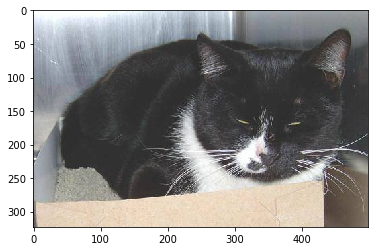

Probability that it is a Cat =  0.86


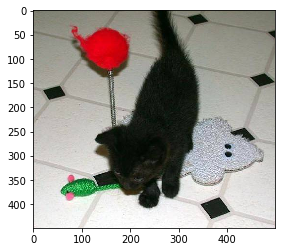

Probability that it is a Cat =  0.69


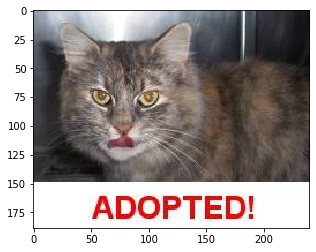

Probability that it is a Cat =  0.65


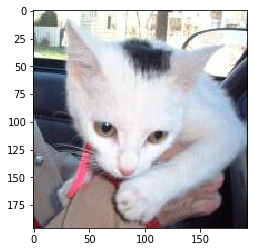

Probability that it is a Cat =  0.00


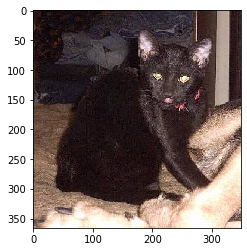

Probability that it is a Cat =  0.07


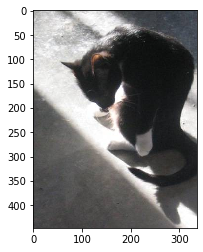

Probability that it is a Cat =  0.98


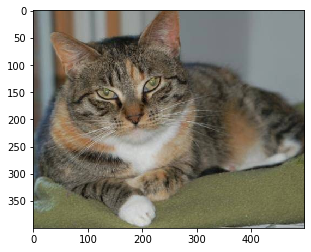

Probability that it is a Cat =  0.82


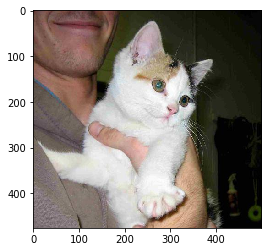

Probability that it is a Cat =  0.80


In [16]:
# Loading the Dataset
folder = "cats_and_dogs_filtered/cats_and_dogs_filtered/validation/"

for i in range(1,9):
    j = i + 2000
    filename = folder + 'cats/' + 'cat.' + str(j) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
    # show the figure
    pyplot.show()
    print("Probability that it is a Cat = ", "%.2f" % df.iloc[i,1])

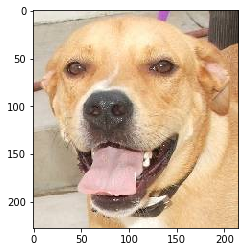

Probability that it is a Dog =  0.81


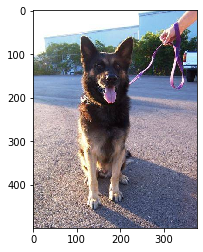

Probability that it is a Dog =  0.49


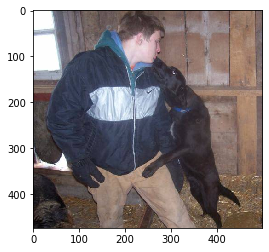

Probability that it is a Dog =  0.91


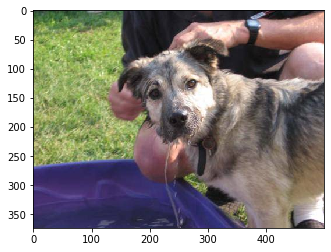

Probability that it is a Dog =  1.00


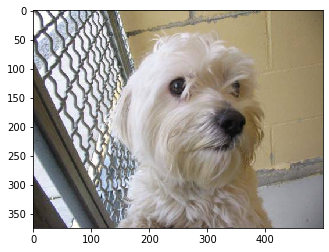

Probability that it is a Dog =  1.00


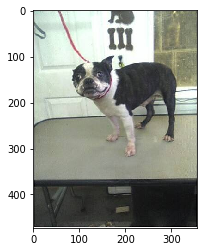

Probability that it is a Dog =  0.82


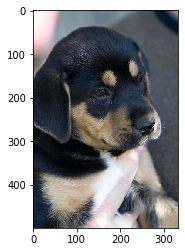

Probability that it is a Dog =  0.99


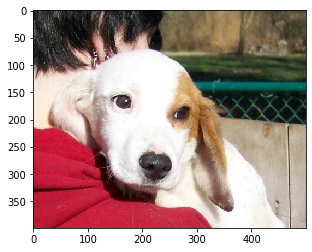

Probability that it is a Dog =  1.00


In [17]:
# Loading the Dataset
folder = "cats_and_dogs_filtered/cats_and_dogs_filtered/validation/"

for i in range(1,9):
    j = i + 2000
    filename = folder + 'dogs/' + 'dog.' + str(j) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
    # show the figure
    pyplot.show()
    print("Probability that it is a Dog = ", "%.2f" % df.iloc[i+500,0])